**Progetto Machine Learning**

Partecipanti
- Fiorentini Nicolò  933157
- Anoir Kadmiri 933097


In questo progetto si propone l'analisi di un dataset, applicazione di tecniche di formattazione e di trasformazione dei dati. Successivamente abbiamo una implementazione alcuni modelli e per concludere abbiamo un confronto delle performance tra i differenti modelli applicati. Dopo una fase iniziale di esplorazione, i dati vengono puliti e normalizzati per garantire qualità e coerenza. Successivamente, vengono applicati di machine learning per individuare pattern, effettuare previsioni. L’obiettivo finale è fornire un confronto tra i modelli applicati, misurandone le perfomance e l'efficenza.









ANALISI DEL DATASET

In [394]:
#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sn
import requests
import seaborn as sns

#drive.mount('/content/drive/')
#df = pd.read_csv("drive/MyDrive/Dataset/diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv")
url = "https://raw.githubusercontent.com/NIKFIORE/Progetto-Machine-Learning/refs/heads/main/Dataset/Cancer_Data.csv"
# Carica il dataset direttamente da GitHub
df = pd.read_csv(url)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [395]:
print(f"Numero di istanze nel dataset: {df.shape[0]}")

Numero di istanze nel dataset: 569


In [396]:
df.drop(columns=["id"], inplace= True)
df.drop(columns=["Unnamed: 32"], inplace= True)
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [397]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [398]:
#controllo il numero di valori duplicati
df.duplicated().sum().item()

0

In [399]:
#controllo presenza di valori nulli
df.isnull().sum().any().item()

False

In [400]:
# Verifico se ci sono valori mancanti
missing_value = df.isnull().values.any()

# Definisco x prima di usarlo
if not missing_value:
    x = "non"
else:
    x = ""

print(f"Questo dataset {x} ha valori mancanti")

Questo dataset non ha valori mancanti


In [401]:
# Controlla i valori unici nella colonna 'diagnosis'
print(df['diagnosis'].unique())

['M' 'B']


In [402]:
# Mappatura della colonna 'diagnosis'
df["diagnosis"] = df["diagnosis"].map({'B': 0, 'M': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [403]:
numeric_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [404]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


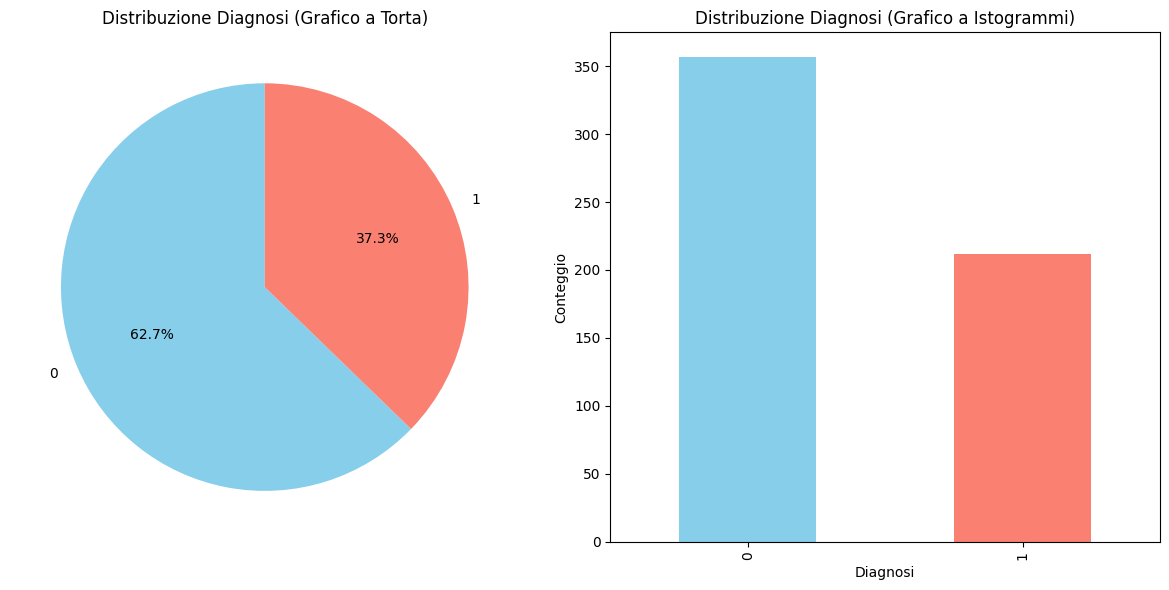

In [405]:
# Plot a torta
plt.figure(figsize=(12, 6))

# Subplot 1: Grafico a torta
plt.subplot(1, 2, 1)
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Torta)')
plt.ylabel('')

# Subplot 2: Grafico a istogrammi
plt.subplot(1, 2, 2)
df['diagnosis'].value_counts().plot.bar(color=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Istogrammi)')
plt.xlabel('Diagnosi')
plt.ylabel('Conteggio')

# Mostra il grafico
plt.tight_layout()
plt.show()

Analisi univariante

L'analisi si riferisce all'esplorazione statistica e grafica di ciascuna variabile numerica separatamente, senza considerare relazioni tra più variabili.Questa analisi è utile per comprendere la distribuzione e la variabilità dei dati prima di passare a metodi più complessi come l'analisi multivariata.

In [406]:
numeric_data = df[numeric_columns]

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(numeric_data.describe())


Statistiche descrittive:
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052

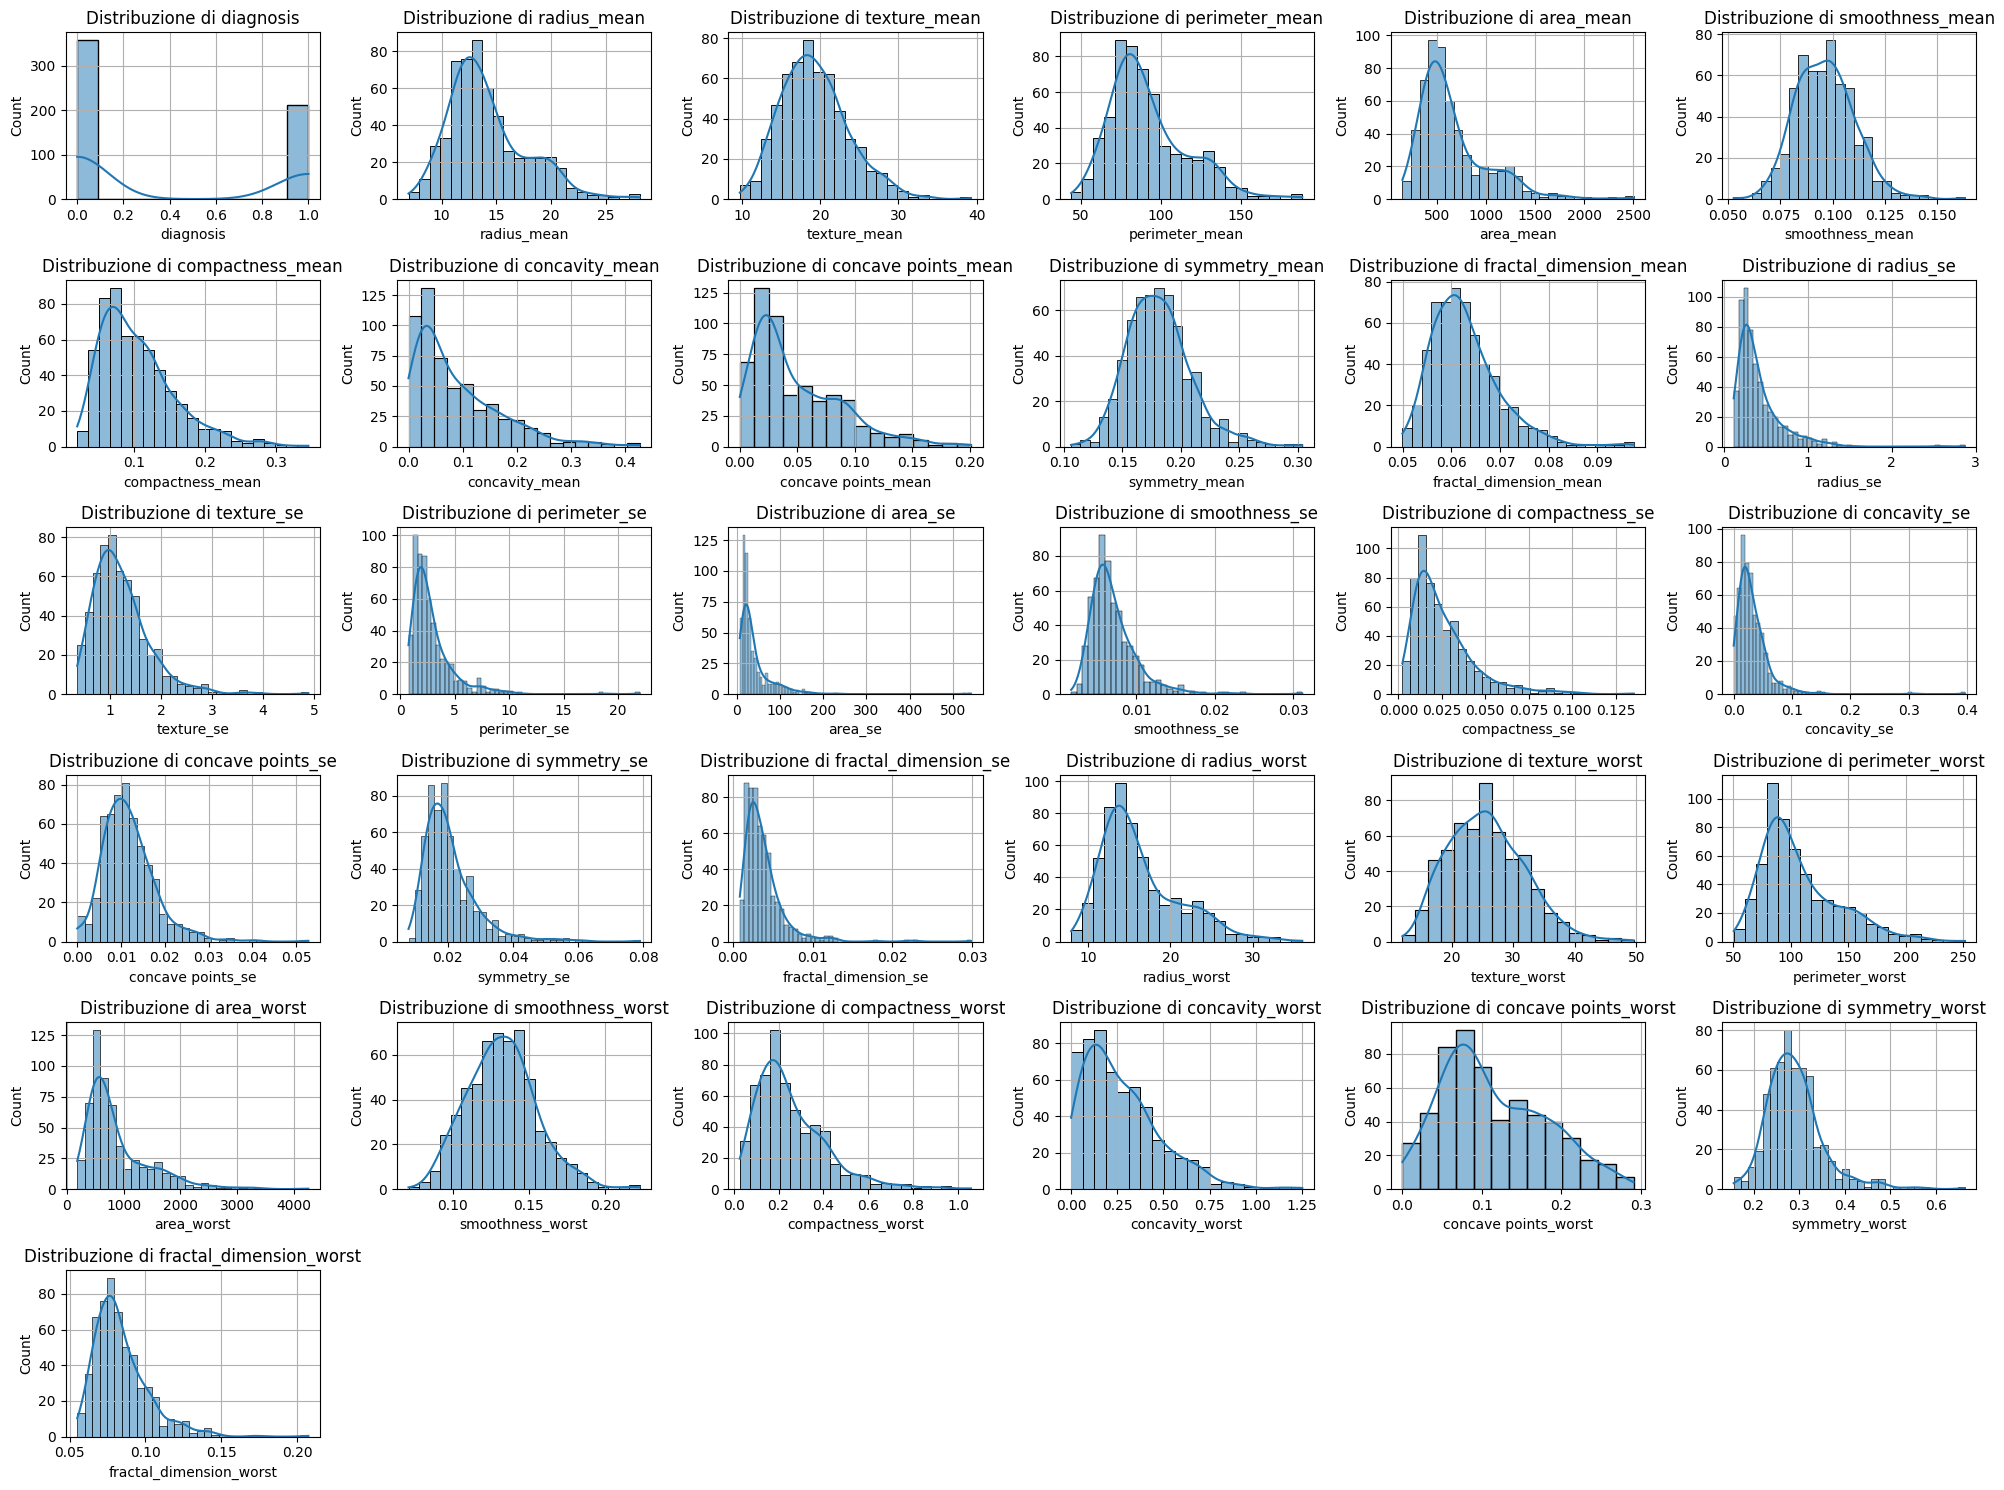

In [407]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 6, i+1)
    # Istogramma
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

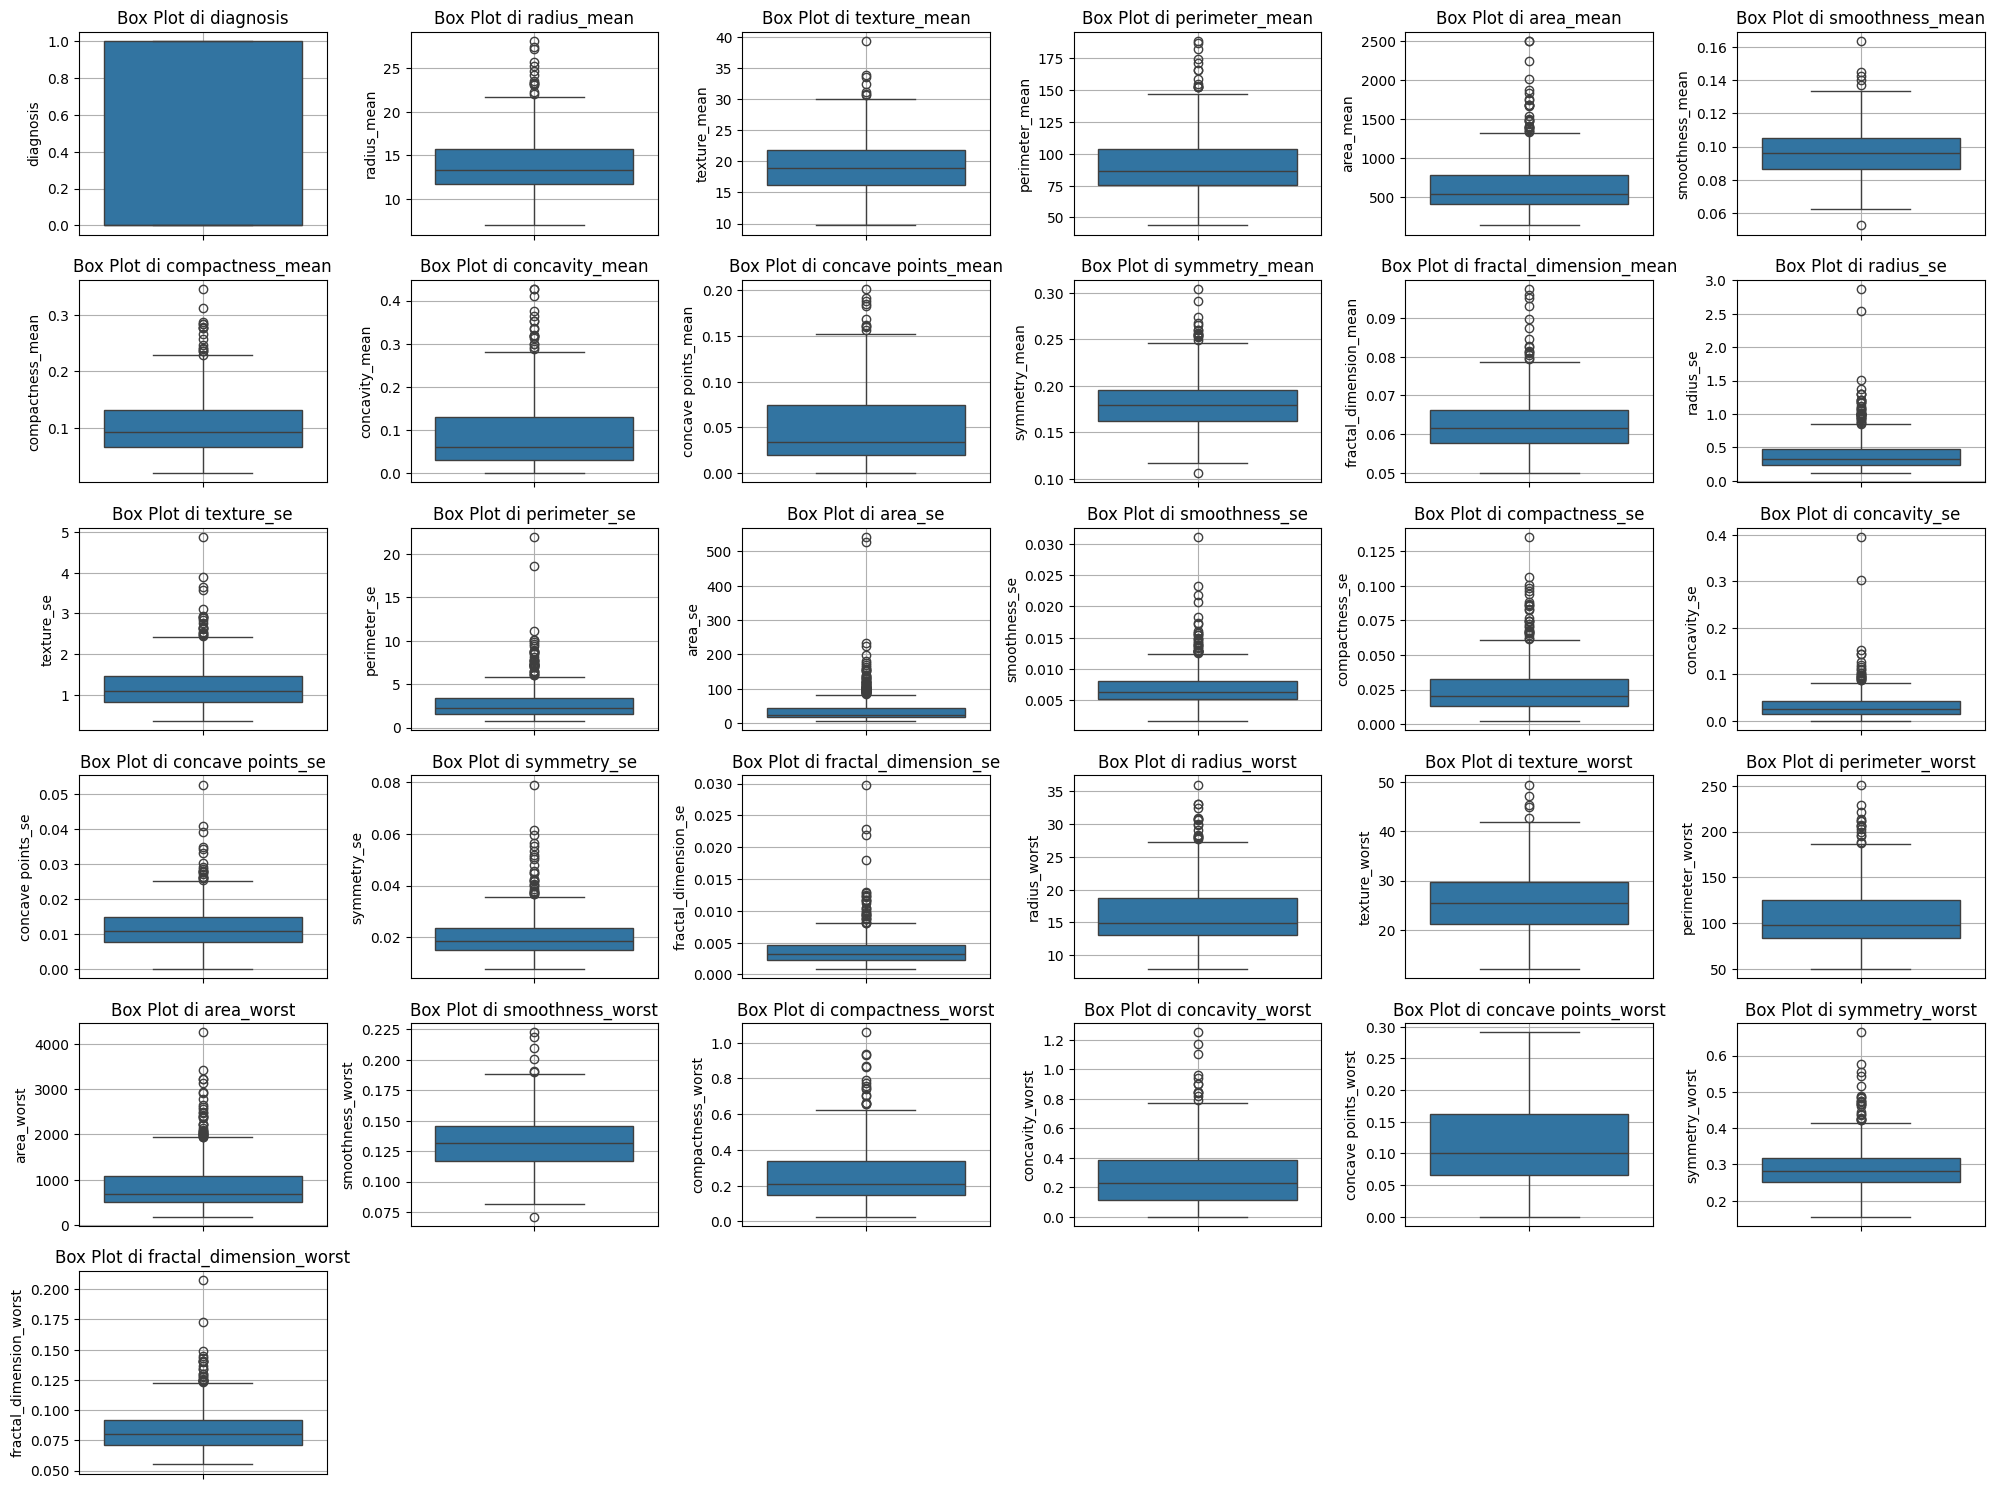

In [408]:
# 3. Box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot di {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

ANALISI MULTIVARIANTE



L'analisi multivariante riguarda lo studio delle relazioni tra più variabili contemporaneamente, con particolare attenzione a come le caratteristiche numeriche influenzano il prezzo.

In [409]:
# Calcolo della matrice di correlazione
correlation_matrix = numeric_data.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


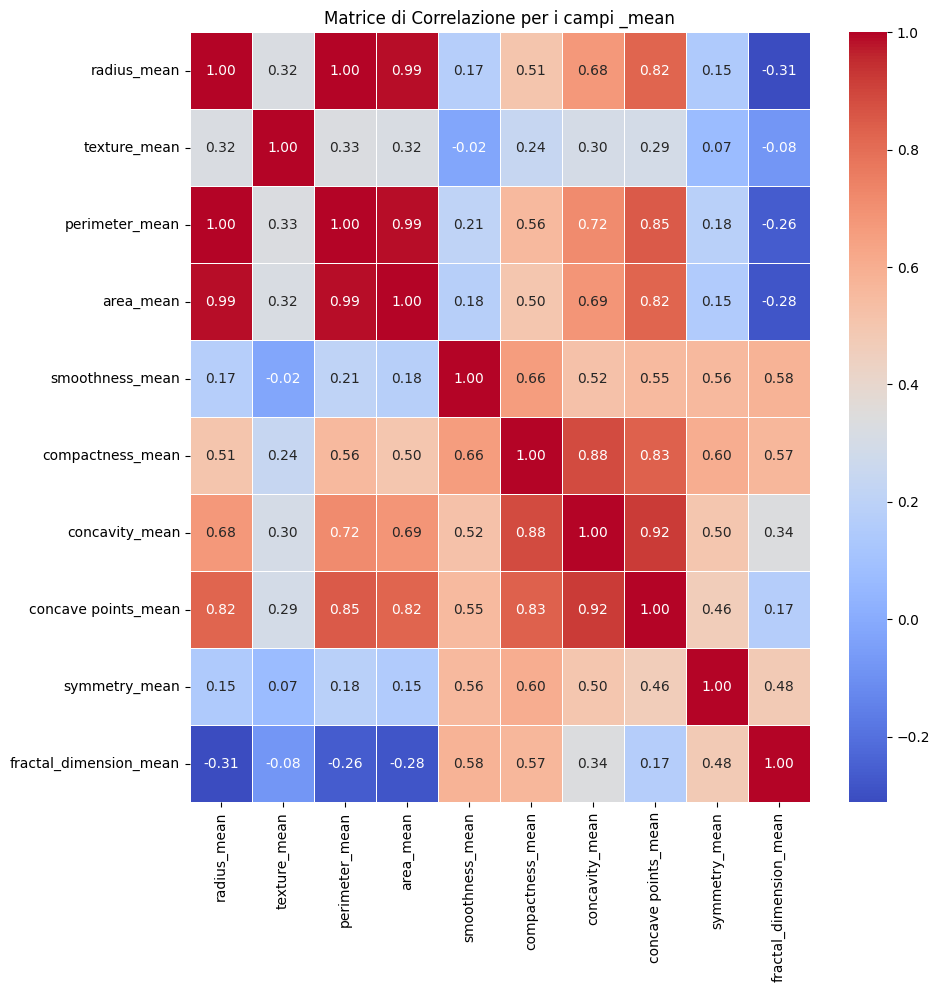

In [410]:
# Filtra le colonne in base ai suffissi
mean_columns = [col for col in df.columns if col.endswith('_mean')]
worst_columns = [col for col in df.columns if col.endswith('_worst')]
se_columns = [col for col in df.columns if col.endswith('_se')]

# Crea una funzione per generare la heatmap
def plot_heatmap(columns, title):
    correlation_matrix = df[columns].corr()  # Calcola la matrice di correlazione
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Heatmap per i campi '_mean'
plot_heatmap(mean_columns, 'Matrice di Correlazione per i campi _mean')

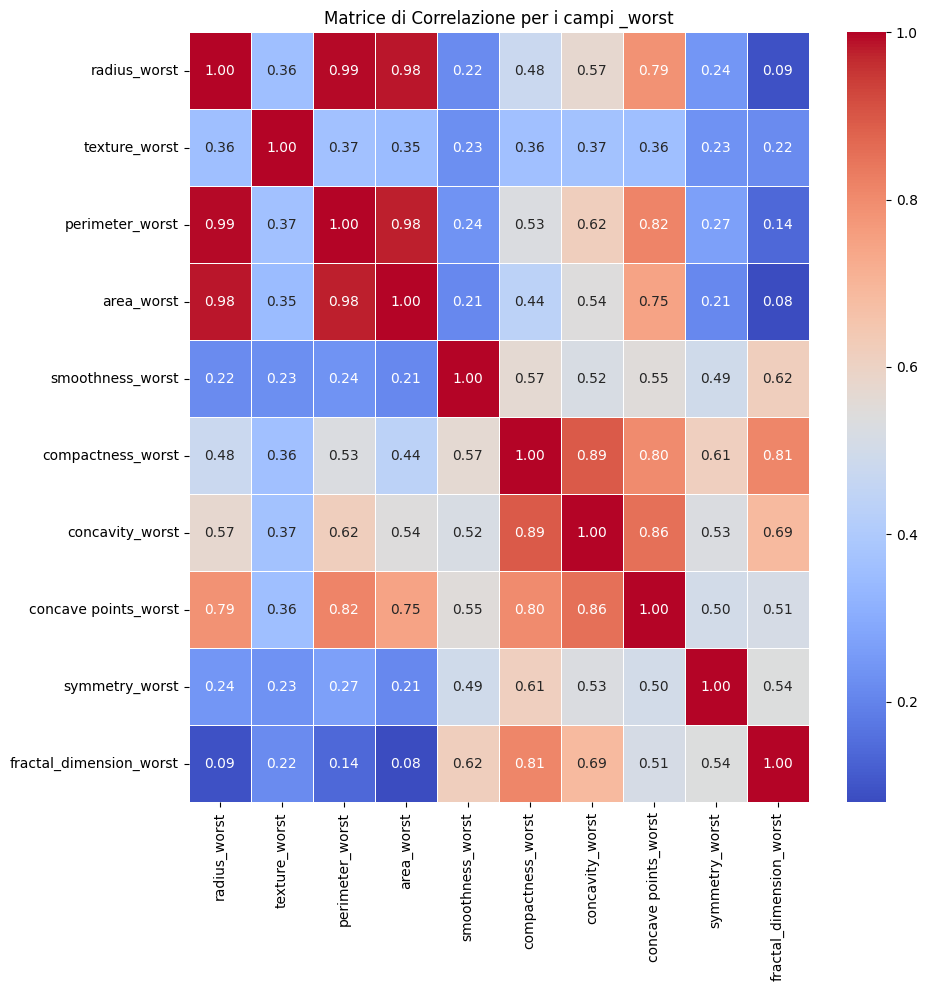

In [411]:
# Heatmap per i campi '_worst'
plot_heatmap(worst_columns, 'Matrice di Correlazione per i campi _worst')

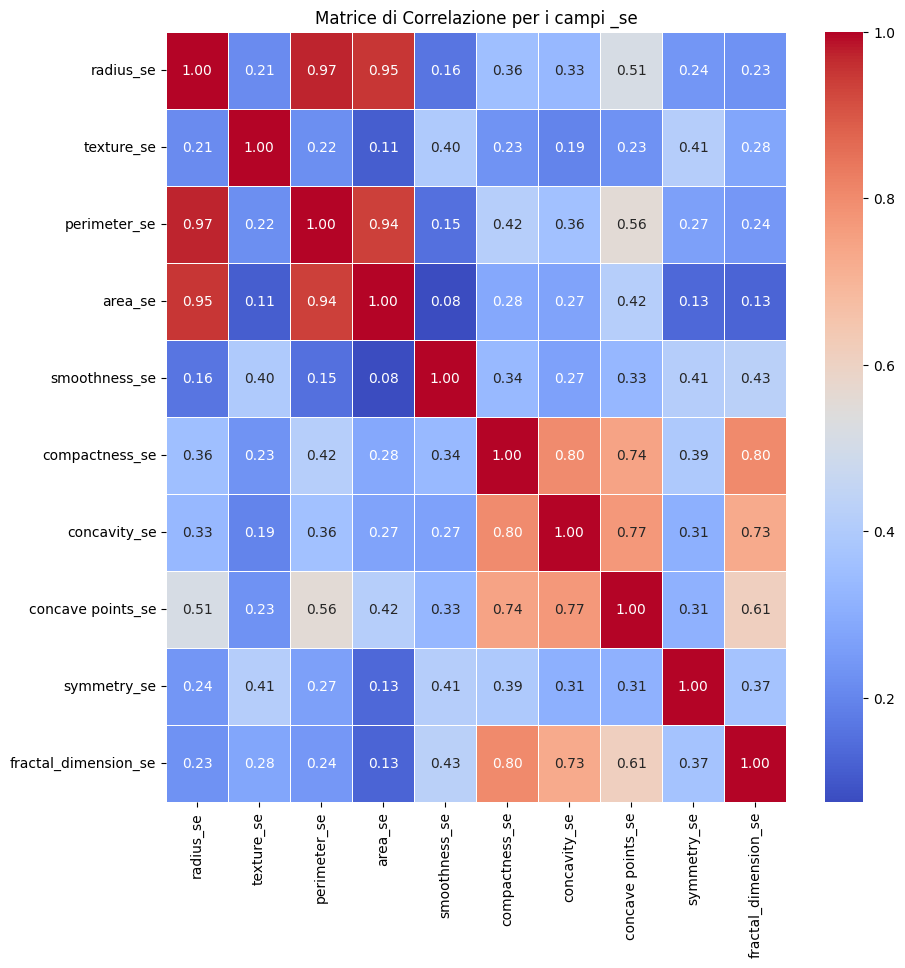

In [412]:
# Heatmap per i campi '_se'
plot_heatmap(se_columns, 'Matrice di Correlazione per i campi _se')

In [413]:
# Correlazione con il target
correlation_with_target = correlation_matrix['diagnosis'].drop('diagnosis')
print("\nCorrelazione delle features con la diagnosi PCOS:")
print(correlation_with_target)


Correlazione delle features con la diagnosi PCOS:
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_wor

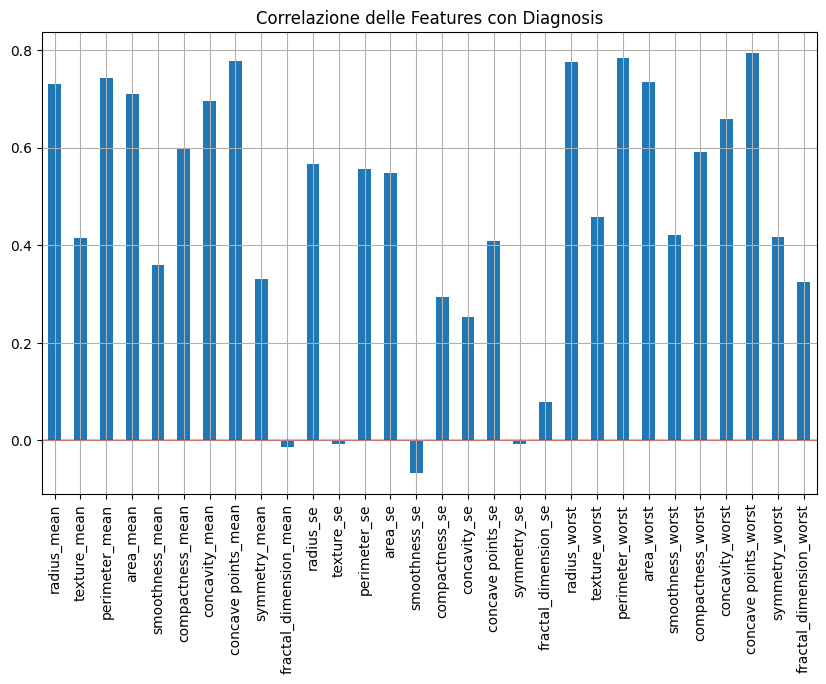

In [414]:
# Visualizzazione grafica delle correlazioni con il target
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlazione delle Features con Diagnosis')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.show()

APPLICAZIONE PCA

In [415]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_data = numeric_data.drop(['diagnosis'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [416]:
# Applicazione della PCA
pca = PCA().fit(scaled_data)

# Varianza spiegata
print("\nVarianza spiegata da ciascuna componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza cumulativa spiegata:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


Varianza spiegata da ciascuna componente:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza cumulativa spiegata:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


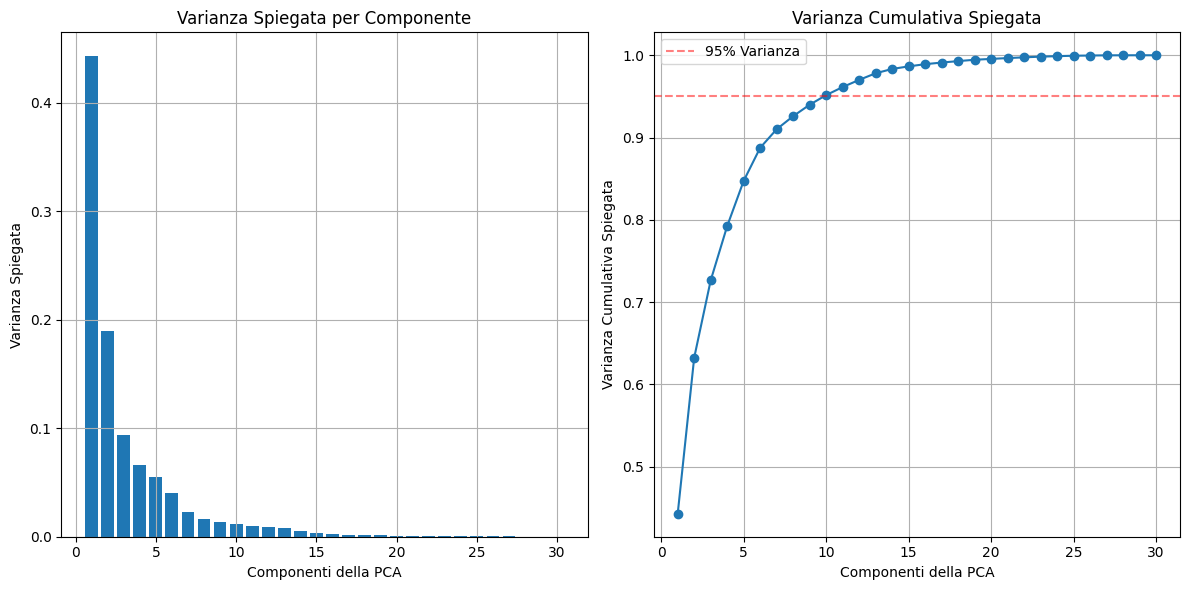

In [417]:
# Visualizzazione della varianza spiegata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata per Componente')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% Varianza')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Cumulativa Spiegata')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [418]:
# Determinare il numero di componenti necessarie per spiegare il 95% della varianza
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1 # Prima componente che supera il 95%
print(f"\nNumero di componenti necessarie per spiegare il 95% della varianza: {n_components_95}")


Numero di componenti necessarie per spiegare il 95% della varianza: 10


Prepariamo il dataset per applicare i modelli

In [419]:
from sklearn.model_selection import train_test_split
# Seleziona feature e target
X = df.drop(['diagnosis'], axis=1)  # Rimuovi la variabile target
y = df['diagnosis']  # Variabile target

#dividiamo il dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manteniamo una copia dei dati originali (non standardizzati)
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [420]:
# Standardiziamo il dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applichiamo la PCA
pca = PCA()
pca.fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Applica la trasformazione PCA con i componenti selezionati
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

RETE NEURALE

 Le Reti Neurali sono modelli di apprendimento supervisionato, il che significa
 che vengono addestrate su un dataset di esempi etichettati, dove sia gli input
 che gli output desiderati sono noti. Durante la fase di addestramento, la rete
 neurale impara a mappare gli input agli output corrispondenti, aggiustando i
 pesi delle connessioni tra i nodi per minimizzare l’errore tra l’output previsto e l’output desiderato.

In [421]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import time

def create_and_train_model(X_train, y_train, X_test, y_test):
    # Usa l'approccio funzionale di Keras con Input layer
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(20, activation="relu")(inputs)
    outputs = Dense(1, activation="sigmoid")(x)

    # Crea il modello
    model = Model(inputs=inputs, outputs=outputs)

    # Compila il modello
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    print("\n")

    # Misurazione del tempo di addestramento
    start_time = time.time()

    # Addestramento del modello
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=10,
        validation_data=(X_test, y_test),
        verbose=2
    )

    # Calcolo del tempo di addestramento
    training_time = time.time() - start_time

    # Stampa del tempo di addestramento
    print(f"\nTempo di addestramento: {training_time:.2f} secondi")
    print(f"Tempo di addestramento: {training_time/60:.2f} minuti")

    return model, history, training_time

In [422]:
# Addestra la rete neurale sui dati originali
model_original_RN, history_original_RN, training_time_original_RN = create_and_train_model(X_train_original, y_train, X_test_original, y_test)

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/50
40/40 - 1s - 37ms/step - accuracy: 0.6131 - loss: 8.5310 - val_accuracy: 0.9064 - val_loss: 0.2103
Epoch 2/50
40/40 - 0s - 6ms/step - accuracy: 0.8744 - loss: 0.5851 - val_accuracy: 0.9123 - val_loss: 0.2044
Epoch 3/50
40/40 - 0s - 7ms/step - accuracy: 0.8995 - loss: 0.4694 - val_accuracy: 0.9357 - val_loss: 0.1449
Epoch 4/50
40/40 - 0s - 7ms/step - accuracy: 0.9020 - loss: 0.4469 - val_accuracy: 0.9415 - val_loss: 0.1318
Epoch 5/50
40/40 - 0s - 9ms/step - accuracy: 0.9020 - loss: 0.4144 - val_accuracy: 0.9474 - val_loss: 0.1798
Epoch 6/50
40/40 - 1s - 15ms/step - accuracy: 0.9070 - loss: 0.4574 - val_accuracy: 0.9532 - val_loss: 0.1476
Epoch 7/50
40/40 - 1s - 16ms/step - accuracy: 0.9095 - loss: 0.4034 - val_accuracy: 0.9415 - val_loss: 0.1542
Epoch 8/50
40/40 - 1s - 15ms/step - accuracy: 0.9020 - loss: 0.3988 - val_accuracy: 0.9474 - val_loss: 0.1194
Epoch 9/50
40/40 - 0s - 6ms/step - accuracy: 0.9045 - loss: 0.3572 - val_accuracy: 0.9181 - val_loss: 0.2451
Epoch 10/50
4

In [423]:
# Addestra la rete neurale su dati PCA ridotti
model_pca_RN, history_pca_RN, training_time_pca_RN = create_and_train_model(X_train_pca, y_train, X_test_pca, y_test)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)



Epoch 1/50
40/40 - 1s - 36ms/step - accuracy: 0.7513 - loss: 0.5597 - val_accuracy: 0.8538 - val_loss: 0.4408
Epoch 2/50
40/40 - 0s - 10ms/step - accuracy: 0.8819 - loss: 0.3934 - val_accuracy: 0.9240 - val_loss: 0.3153
Epoch 3/50
40/40 - 0s - 7ms/step - accuracy: 0.9121 - loss: 0.3042 - val_accuracy: 0.9591 - val_loss: 0.2490
Epoch 4/50
40/40 - 0s - 8ms/step - accuracy: 0.9447 - loss: 0.2513 - val_accuracy: 0.9591 - val_loss: 0.2095
Epoch 5/50
40/40 - 0s - 8ms/step - accuracy: 0.9573 - loss: 0.2167 - val_accuracy: 0.9532 - val_loss: 0.1804
Epoch 6/50
40/40 - 0s - 8ms/step - accuracy: 0.9623 - loss: 0.1909 - val_accuracy: 0.9532 - val_loss: 0.1593
Epoch 7/50
40/40 - 0s - 8ms/step - accuracy: 0.9673 - loss: 0.1719 - val_accuracy: 0.9591 - val_loss: 0.1421
Epoch 8/50
40/40 - 0s - 6ms/step - accuracy: 0.9698 - loss: 0.1568 - val_accuracy: 0.9591 - val_loss: 0.1294
Epoch 9/50
40/40 - 0s - 7ms/step - accuracy: 0.9724 - loss: 0.1446 - val_accuracy: 0.9649 - val_loss: 0.1193
Epoch 10/50
40/

In [424]:
# Valutiamo entrambi i modelli
y_pred_original_RN = (model_original_RN.predict(X_test_scaled) > 0.5).astype(int)
y_pred_pca_RN = (model_pca_RN.predict(X_test_pca) > 0.5).astype(int)

# Calcoliamo le metriche
accuracy_original_RN = accuracy_score(y_test, y_pred_original_RN)
accuracy_pca_RN = accuracy_score(y_test, y_pred_pca_RN)

print(f"Accuracy with original data: {accuracy_original_RN:.4f}")
print(f"Accuracy with PCA-reduced data: {accuracy_pca_RN:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy with original data: 0.8304
Accuracy with PCA-reduced data: 0.9766


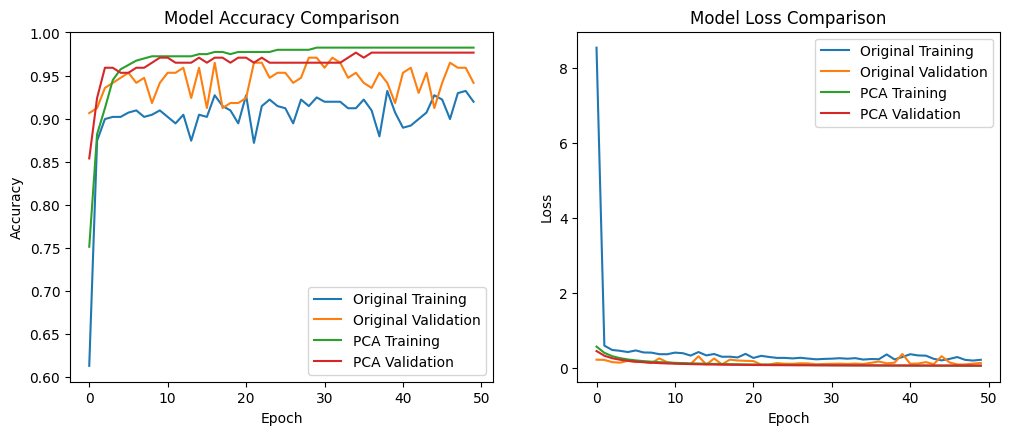

In [425]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(history_original_RN.history['accuracy'], label='Original Training')
plt.plot(history_original_RN.history['val_accuracy'], label='Original Validation')
plt.plot(history_pca_RN.history['accuracy'], label='PCA Training')
plt.plot(history_pca_RN.history['val_accuracy'], label='PCA Validation')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history_original_RN.history['loss'], label='Original Training')
plt.plot(history_original_RN.history['val_loss'], label='Original Validation')
plt.plot(history_pca_RN.history['loss'], label='PCA Training')
plt.plot(history_pca_RN.history['val_loss'], label='PCA Validation')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


Dall'analisi delle curve di perdita e di accuratezza, insieme al confronto dei valori di accuracy ottenuti dai due modelli (uno addestrato su un dataset con PCA applicata e l'altro senza PCA), abbiamo concluso che il modello più efficiente è quello addestrato con l'applicazione della PCA.

Il salto da 84% a 98% è molto alto, quindi è bene capire cosa è successo. Ecco alcune possibili spiegazioni:
- Effetto della standardizzazione: Le reti neurali sono molto sensibili alla scala dei dati. Se i dati grezzi avevano scale molto diverse, lo standard scaler ha potuto migliorare la convergenza del modello.

In [426]:
# Predizioni (probabilità di avere tumore)
y_pred_train_prob_RN = model_pca_RN.predict(X_train_pca).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_train_RN = (y_pred_train_prob_RN > 0.5).astype(int)

y_pred_test_prob_RN = model_pca_RN.predict(X_test_pca).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_test_RN = (y_pred_test_prob_RN > 0.5).astype(int)

# Report di classificazione per i set di training e test
print("\nReport di Classificazione - Set di Training:")
print(classification_report(y_train, y_pred_train_RN,
                            target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Set di Test:")
print(classification_report(y_test, y_pred_test_RN,
                            target_names=['Benigno', 'Maligno']))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Report di Classificazione - Set di Training:
              precision    recall  f1-score   support

     Benigno       0.98      0.99      0.99       249
     Maligno       0.98      0.97      0.98       149

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398


Report di Classificazione - Set di Test:
              precision    recall  f1-score   support

     Benigno       0.98      0.98      0.98       108
     Maligno       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



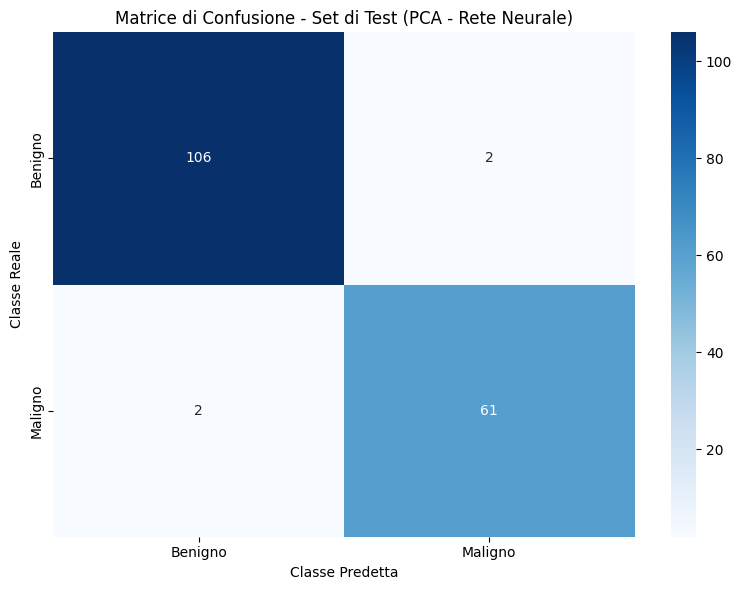

In [427]:
# Matrice di confusione per il set di test
plt.figure(figsize=(8, 6))
cm_test_RN = confusion_matrix(y_test, y_pred_test_RN)
sns.heatmap(cm_test_RN, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matrice di Confusione - Set di Test (PCA - Rete Neurale)')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()

Valore dell'AUC: 0.9988


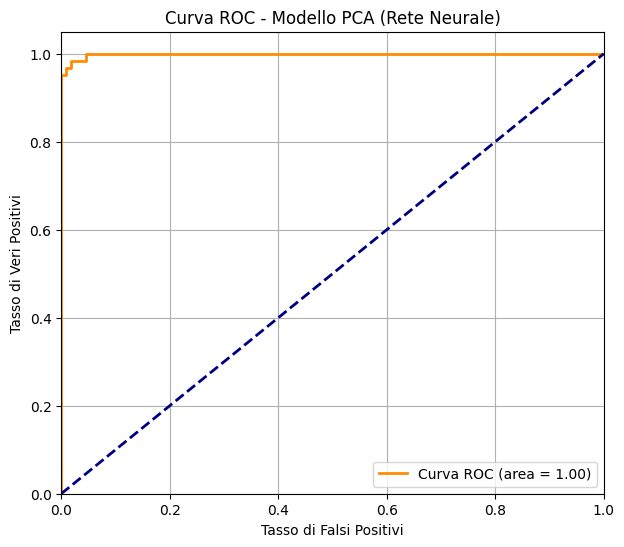

In [428]:
# Calcolo della curva ROC
fpr_RN, tpr_RN, thresholds_RN = roc_curve(y_test, y_pred_test_prob_RN)
roc_auc_RN = auc(fpr_RN, tpr_RN)

# Stampa del valore AUC
print(f'Valore dell\'AUC: {roc_auc_RN:.4f}')

# Visualizzazione della curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_RN, tpr_RN, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc_RN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Modello PCA (Rete Neurale)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [429]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as st
import numpy as np
import time

# Parametri per la cross-validation
n_fold = 10

# StratifiedKFold
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
accuracy_stratified_RN = []

# Preparazione dei dati
X_scaled = scaler.transform(X)  # Utilizziamo lo stesso scaler già addestrato
X_pca = pca.transform(X_scaled)  # Utilizziamo lo stesso PCA già addestrato

# Timer per misurare il tempo di esecuzione
start_time_RN = time.time()

print("Esecuzione StratifiedKFold con modello PCA (Rete Neurale) esistente...")
for fold, (train_idx, valid_idx) in enumerate(stratified_folds.split(X_pca, y)):
    # Estraiamo i dati di questo fold
    X_valid_fold = X_pca[valid_idx]
    y_valid_fold = y.iloc[valid_idx].values

    # Utilizziamo il modello già addestrato per fare predizioni
    y_pred_prob_RN = model_pca_RN.predict(X_valid_fold).flatten()
    y_pred_RN = (y_pred_prob_RN > 0.5).astype(int)

    # Calcolo dell'accuratezza
    accuracy_RN = accuracy_score(y_valid_fold, y_pred_RN)
    accuracy_stratified_RN.append(accuracy_RN)

    print(f"Fold {fold+1}/{n_fold}: Accuracy = {accuracy_RN:.4f}")

# Calcolo della media e dell'intervallo di confidenza
mean_stratified_RN = np.mean(accuracy_stratified_RN)
std_dev_stratified_RN = np.std(accuracy_stratified_RN)

# Intervallo di confidenza al 90%
ci_stratified_RN = st.t.interval(confidence=0.90, df=len(accuracy_stratified_RN)-1,
                                 loc=mean_stratified_RN, scale=st.sem(accuracy_stratified_RN))

# Tempo di esecuzione
execution_time_RN = time.time() - start_time_RN

# Risultati finali
print("\nRisultati finali (Modello PCA - Rete Neurale):")
print(f"StratifiedKFold Accuracy Media: {mean_stratified_RN:.4f}")
print(f"Deviazione Standard dei punteggi di accuratezza: {std_dev_stratified_RN:.4f}")
print(f"Intervallo di confidenza al 90%: [{ci_stratified_RN[0]:.4f}, {ci_stratified_RN[1]:.4f}]")
print(f"Tempo di esecuzione del 10-fold StratifiedKFold: {execution_time_RN:.4f} secondi")


Esecuzione StratifiedKFold con modello PCA (Rete Neurale) esistente...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 1/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 2/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fold 3/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4/10: Accuracy = 0.9649
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5/10: Accuracy = 0.9649
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 6/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 7/10: Accuracy = 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 8/10: Accuracy = 0.9649
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 9/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 10/10: Accuracy = 1.0000

Risultati finali (Modello PCA - Rete Neurale):
StratifiedKFold Accuracy Media: 0.9807
Deviazione Standard dei punteggi di accuratezza: 0.0123
Intervallo di confidenza al 90%: [0.9732, 0.9882]
Tempo di esecuzione del 10-fold StratifiedKFold: 1.1423 secondi


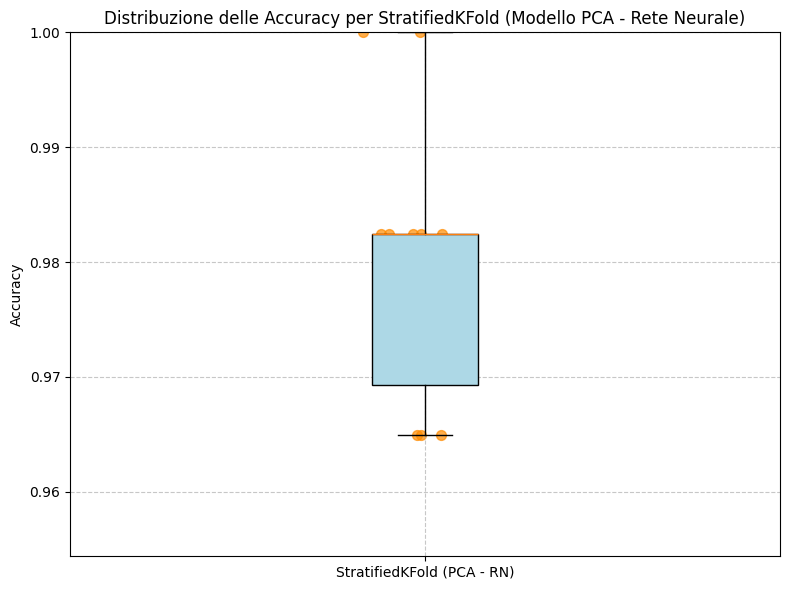

In [430]:
# Grafico della distribuzione dell'accuracy (modificato)
plt.figure(figsize=(8, 6))

# Calcoliamo il range dei dati per impostare limiti più appropriati
min_acc_RN = min(accuracy_stratified_RN)
max_acc_RN = max(accuracy_stratified_RN)
range_acc_RN = max_acc_RN - min_acc_RN
y_min_RN = max(0.5, min_acc_RN - range_acc_RN * 0.3)  # Abbassiamo il limite inferiore mantenendo almeno 0.5
y_max_RN = min(1.0, max_acc_RN + range_acc_RN * 0.3)  # Alziamo il limite superiore senza superare 1.0

# Creazione del boxplot
plt.boxplot([accuracy_stratified_RN], tick_labels=['StratifiedKFold (PCA - RN)'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Sovrapporre i punti individuali
x = np.random.normal(1, 0.04, size=len(accuracy_stratified_RN))
plt.scatter(x, accuracy_stratified_RN, alpha=0.7, s=50, color='darkorange')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Distribuzione delle Accuracy per StratifiedKFold (Modello PCA - Rete Neurale)')
plt.ylim([y_min_RN, y_max_RN])  # Limitiamo la scala y per centrare meglio i dati

plt.tight_layout()
plt.show()

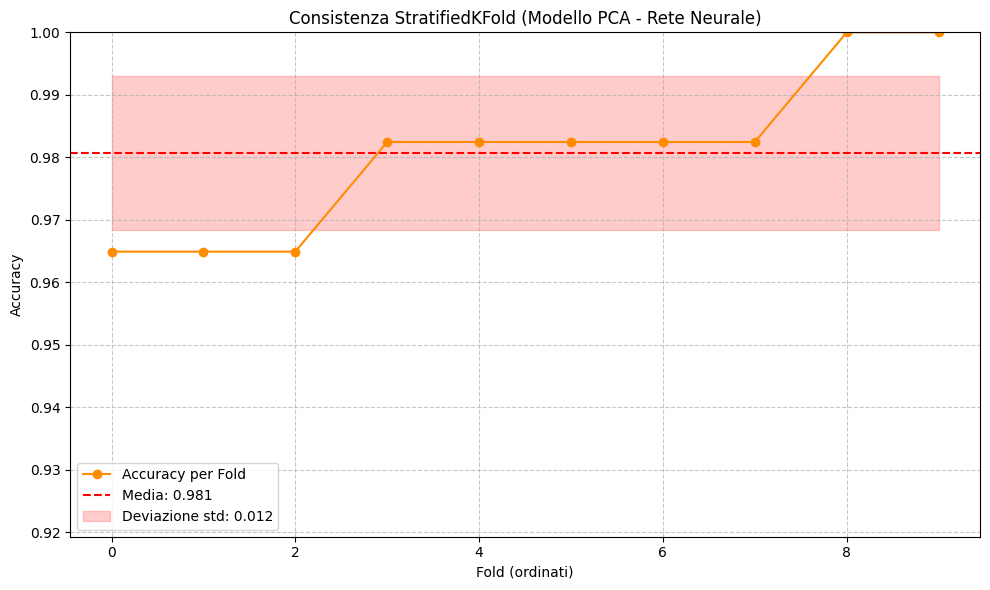

In [431]:
plt.figure(figsize=(10, 6))
x_indices_RN = np.arange(len(accuracy_stratified_RN))

# Calcoliamo i limiti per centrare meglio il grafico
mean_acc_RN = np.mean(accuracy_stratified_RN)
std_acc_RN = np.std(accuracy_stratified_RN)
y_min_RN = max(0.5, mean_acc_RN - 5 * std_acc_RN)  # 5 deviazioni standard sotto la media, ma non meno di 0.5
y_max_RN = min(1.0, mean_acc_RN + 5 * std_acc_RN)  # 5 deviazioni standard sopra la media, ma non più di 1.0

plt.plot(x_indices_RN, sorted(accuracy_stratified_RN), 'o-', label='Accuracy per Fold', color='darkorange')
plt.axhline(y=mean_acc_RN, color='red', linestyle='--', label=f'Media: {mean_acc_RN:.3f}')
plt.fill_between(x_indices_RN, mean_acc_RN - std_acc_RN,
                 mean_acc_RN + std_acc_RN, alpha=0.2, color='red',
                 label=f'Deviazione std: {std_acc_RN:.3f}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Consistenza StratifiedKFold (Modello PCA - Rete Neurale)')
plt.xlabel('Fold (ordinati)')
plt.ylabel('Accuracy')
plt.ylim([y_min_RN, y_max_RN])  # Limitiamo la scala y per centrare meglio i dati
plt.legend()

plt.tight_layout()
plt.show()

SVM

In [432]:
from sklearn.svm import SVC
from time import time

def create_train_SVM(X_train, y_train, dataset_name):
    # Creazione e addestramento del modello SVM
    print(f"\nCreazione e addestramento SVM su {dataset_name}:")
    start_time = time()
    svm_model = SVC(kernel="linear", probability=True, random_state=54)
    svm_model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time

    print(f"Tempo di training: {training_time:.4f} secondi")

    return svm_model, training_time

# Creiamo e addestriamo i modelli SVM per i due dataset
model_original_SVM, training_time_original_SVM = create_train_SVM(X_train_original, y_train, "Dati Grezzi")
model_pca_SVM, training_time_pca_SVM = create_train_SVM(X_train_pca, y_train, "Dati PCA")


Creazione e addestramento SVM su Dati Grezzi:
Tempo di training: 11.5762 secondi

Creazione e addestramento SVM su Dati PCA:
Tempo di training: 0.0102 secondi


In [433]:
# Valutiamo entrambi i modelli SVM
y_pred_original_SVM = model_original_SVM.predict(X_test_original)
y_pred_pca_SVM = model_pca_SVM.predict(X_test_pca)

# Calcoliamo le metriche
accuracy_original_SVM = accuracy_score(y_test, y_pred_original_SVM)
accuracy_pca_SVM = accuracy_score(y_test, y_pred_pca_SVM)

print(f"Accuracy with original data (SVM): {accuracy_original_SVM:.4f}")
print(f"Accuracy with PCA-reduced data (SVM): {accuracy_pca_SVM:.4f}")
print(f"Differenza di accuracy (SVM): {abs(accuracy_original_SVM - accuracy_pca_SVM):.4f}")

Accuracy with original data (SVM): 0.9649
Accuracy with PCA-reduced data (SVM): 0.9883
Differenza di accuracy (SVM): 0.0234


In [434]:
# Confronto dei Support Vectors
n_support_original_SVM = sum(model_original_SVM.n_support_)
n_support_pca_SVM = sum(model_pca_SVM.n_support_)
print(f"\nNumero di Support Vectors (Dati Originali - SVM): {n_support_original_SVM}")
print(f"Numero di Support Vectors (Dati PCA - SVM): {n_support_pca_SVM}")


Numero di Support Vectors (Dati Originali - SVM): 48
Numero di Support Vectors (Dati PCA - SVM): 35


In [435]:
# Report di classificazione
print("\nReport di Classificazione - Dati Originali (SVM):")
print(classification_report(y_test, y_pred_original_SVM,
                            target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Dati PCA (SVM):")
print(classification_report(y_test, y_pred_pca_SVM,
                            target_names=['Benigno', 'Maligno']))


Report di Classificazione - Dati Originali (SVM):
              precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97       108
     Maligno       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Report di Classificazione - Dati PCA (SVM):
              precision    recall  f1-score   support

     Benigno       0.99      0.99      0.99       108
     Maligno       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



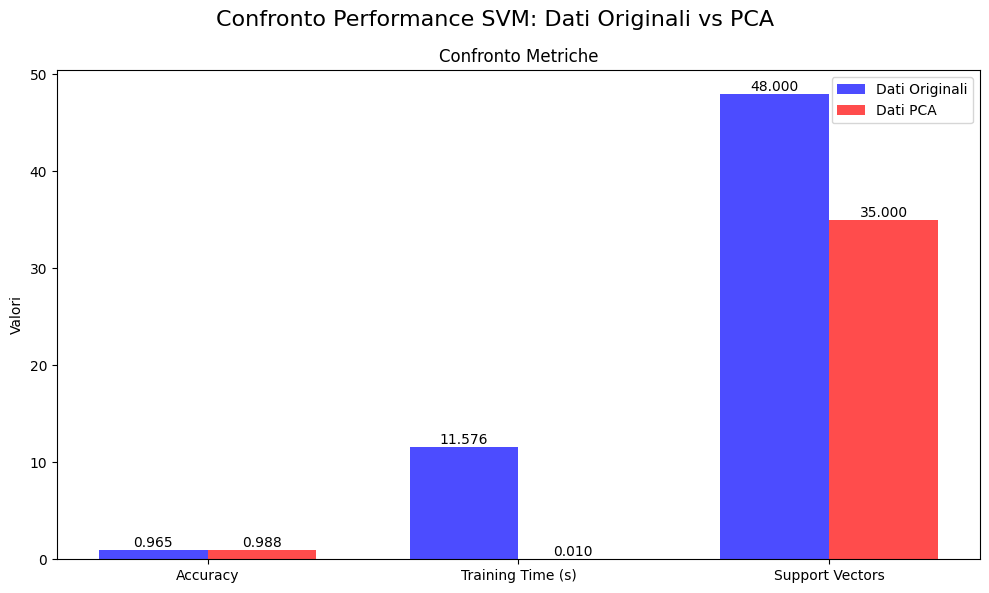

In [436]:
def plot_svm_performance_comparison(accuracy_original_SVM, accuracy_pca_SVM,
                                    training_time_original_SVM, training_time_pca_SVM,
                                    n_support_original_SVM, n_support_pca_SVM):
    # Preparazione dei dati
    metrics = ['Accuracy', 'Training Time (s)', 'Support Vectors']
    original_data = [accuracy_original_SVM, training_time_original_SVM, n_support_original_SVM]
    pca_data = [accuracy_pca_SVM, training_time_pca_SVM, n_support_pca_SVM]

    # Configurazione del grafico
    plt.figure(figsize=(10, 6))
    plt.suptitle('Confronto Performance SVM: Dati Originali vs PCA', fontsize=16)

    # Bar plot
    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, original_data, width, label='Dati Originali', color='blue', alpha=0.7)
    plt.bar(x + width/2, pca_data, width, label='Dati PCA', color='red', alpha=0.7)

    plt.ylabel('Valori')
    plt.title('Confronto Metriche')
    plt.xticks(x, metrics)
    plt.legend()

    # Aggiunta dei valori sulle barre
    for i, v1, v2 in zip(x, original_data, pca_data):
        plt.text(i - width/2, v1, f'{v1:.3f}', ha='center', va='bottom')
        plt.text(i + width/2, v2, f'{v2:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Chiamata alla funzione con i dati correnti
plot_svm_performance_comparison(
    accuracy_original_SVM, accuracy_pca_SVM,
    training_time_original_SVM, training_time_pca_SVM,
    n_support_original_SVM, n_support_pca_SVM
)

L'analisi dei risultati mostra che, sebbene la SVM addestrata sui dati ridotti con PCA ottenga solo una leggera miglioria in termini di accuracy (+2.34%), presenta vantaggi significativi sul piano computazionale: il tempo di training è drasticamente ridotto (0.0102s vs 11.2827s). Inoltre, l’utilizzo della PCA comporta una riduzione del numero di support vectors (35 contro 48), segno di un modello più compatto e potenzialmente più generalizzabile. Considerando che le prestazioni predittive non solo non peggiorano, ma migliorano leggermente, e che il carico computazionale risulta nettamente inferiore, è preferibile adottare la SVM sui dati trasformati con PCA, in quanto offre un miglior equilibrio tra efficienza e accuratezza.

\\
Anche considerando il costo computazionale aggiuntivo della PCA, il guadagno in termini di tempo di addestramento e la riduzione della complessità del modello (meno vettori di supporto) probabilmente compensano ampiamente questo costo, specialmente se il modello deve essere riaddestrato frequentemente o usato per previsioni in tempo reale.RetryClaude can make mistakes. Please double-check responses.

In [437]:
# Predizioni (probabilità di avere tumore)
# Utilizziamo il modello SVM sui dati PCA per le predizioni di probabilità
y_pred_train_prob_SVM = model_pca_SVM.predict_proba(X_train_pca)[:, 1]
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_train_SVM = (y_pred_train_prob_SVM > 0.5).astype(int)

y_pred_test_prob_SVM = model_pca_SVM.predict_proba(X_test_pca)[:, 1]
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_test_SVM = (y_pred_test_prob_SVM > 0.5).astype(int)

# Report di classificazione per i set di training e test
print("\nReport di Classificazione - Set di Training (SVM con PCA):")
print(classification_report(y_train, y_pred_train_SVM,
                         target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Set di Test (SVM con PCA):")
print(classification_report(y_test, y_pred_test_SVM,
                         target_names=['Benigno', 'Maligno']))


Report di Classificazione - Set di Training (SVM con PCA):
              precision    recall  f1-score   support

     Benigno       0.97      0.99      0.98       249
     Maligno       0.98      0.95      0.97       149

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398


Report di Classificazione - Set di Test (SVM con PCA):
              precision    recall  f1-score   support

     Benigno       0.99      0.99      0.99       108
     Maligno       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



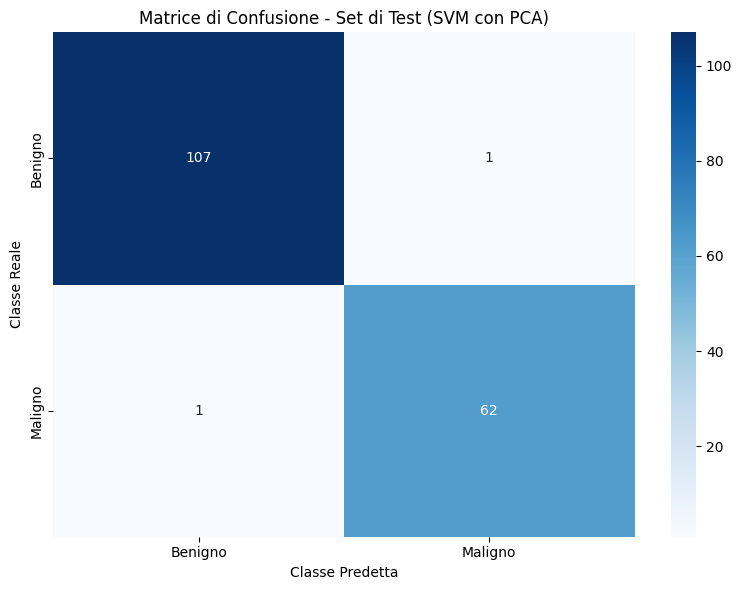

In [438]:
# Matrice di confusione per il set di test (SVM con PCA)
plt.figure(figsize=(8, 6))
cm_test_SVM = confusion_matrix(y_test, y_pred_test_SVM)
sns.heatmap(cm_test_SVM, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matrice di Confusione - Set di Test (SVM con PCA)')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()

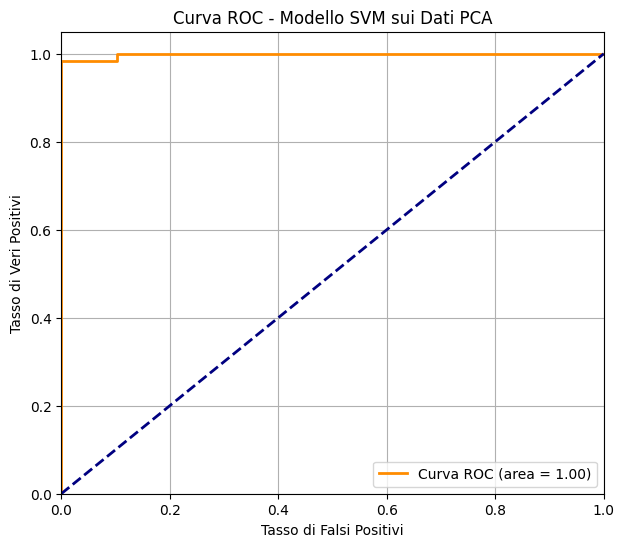

In [439]:
# Calcolo della curva ROC usando le probabilità del modello SVM sui dati PCA
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_pred_test_prob_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

# Visualizzazione della curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc_SVM:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Modello SVM sui Dati PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [440]:
import time
n_fold = 10

# StratifiedKFold
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
accuracy_stratified_SVM = []

# Preparazione dei dati - applica PCA ai dati scalati
# Assumiamo che pca è l'oggetto PCA già addestrato sui dati originali
X_scaled = scaler.transform(X)
X_pca = pca.transform(X_scaled)

start_time = time.time()  # Inizio misurazione tempo

print("Esecuzione StratifiedKFold con modello SVM su dati PCA...")
for fold, (train_idx, valid_idx) in enumerate(stratified_folds.split(X_pca, y)):
    # Estraiamo i dati di questo fold
    X_valid_fold_SVM = X_pca[valid_idx]
    y_valid_fold_SVM = y.iloc[valid_idx].values

    # Utilizziamo il modello SVM sui dati PCA per fare predizioni
    y_pred_prob_SVM = model_pca_SVM.predict_proba(X_valid_fold_SVM)[:, 1]
    y_pred_SVM = (y_pred_prob_SVM > 0.5).astype(int)

    # Calcolo dell'accuratezza
    accuracy_SVM = accuracy_score(y_valid_fold_SVM, y_pred_SVM)
    accuracy_stratified_SVM.append(accuracy_SVM)

    print(f"Fold {fold+1}/{n_fold}: Accuracy = {accuracy_SVM:.4f}")

# Calcolo della media e dell'intervallo di confidenza
mean_stratified_SVM = np.mean(accuracy_stratified_SVM)
std_dev_stratified_SVM = np.std(accuracy_stratified_SVM, ddof=1)  # ddof=1 per std campionaria

# Intervallo di confidenza al 90%
ci_stratified_SVM = st.t.interval(confidence=0.90, df=len(accuracy_stratified_SVM)-1,
                                  loc=mean_stratified_SVM, scale=st.sem(accuracy_stratified_SVM))

# Tempo di esecuzione
execution_time_SVM = time.time() - start_time

# Risultati finali
print("\nRisultati finali (Modello SVM con PCA):")
print(f"StratifiedKFold Accuracy Media: {mean_stratified_SVM:.4f}")
print(f"Deviazione Standard dei punteggi di accuratezza: {std_dev_stratified_SVM:.4f}")
print(f"Intervallo di confidenza al 90%: [{ci_stratified_SVM[0]:.4f}, {ci_stratified_SVM[1]:.4f}]")
print(f"Tempo di esecuzione del 10-fold StratifiedKFold: {execution_time_SVM:.4f} secondi")


Esecuzione StratifiedKFold con modello SVM su dati PCA...
Fold 1/10: Accuracy = 0.9825
Fold 2/10: Accuracy = 0.9825
Fold 3/10: Accuracy = 1.0000
Fold 4/10: Accuracy = 0.9474
Fold 5/10: Accuracy = 0.9825
Fold 6/10: Accuracy = 0.9649
Fold 7/10: Accuracy = 1.0000
Fold 8/10: Accuracy = 0.9649
Fold 9/10: Accuracy = 0.9825
Fold 10/10: Accuracy = 0.9821

Risultati finali (Modello SVM con PCA):
StratifiedKFold Accuracy Media: 0.9789
Deviazione Standard dei punteggi di accuratezza: 0.0161
Intervallo di confidenza al 90%: [0.9696, 0.9883]
Tempo di esecuzione del 10-fold StratifiedKFold: 0.0188 secondi


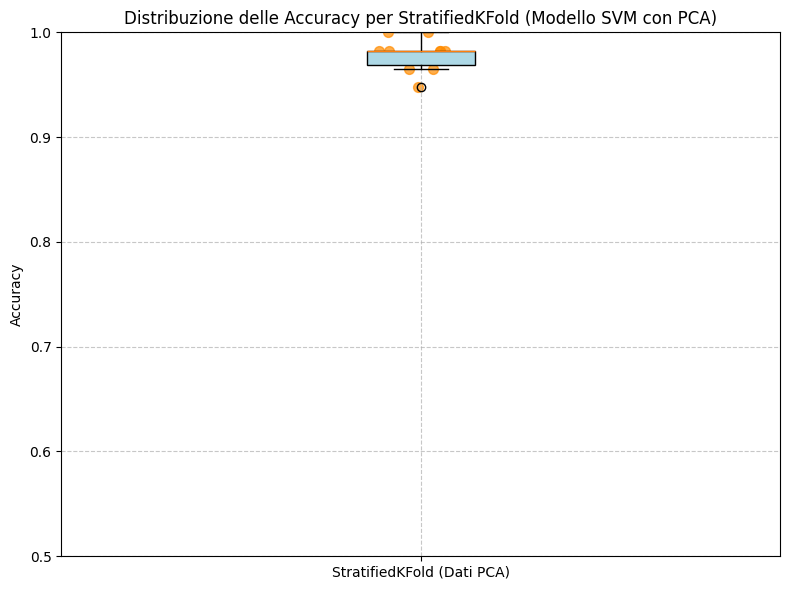

In [441]:
# Grafico della distribuzione dell'accuracy
plt.figure(figsize=(8, 6))

# Creazione del boxplot
plt.boxplot([accuracy_stratified_SVM], tick_labels=['StratifiedKFold (Dati PCA)'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Sovrapporre i punti individuali
x = np.random.normal(1, 0.04, size=len(accuracy_stratified_SVM))
plt.scatter(x, accuracy_stratified_SVM, alpha=0.7, s=50, color='darkorange')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Distribuzione delle Accuracy per StratifiedKFold (Modello SVM con PCA)')
plt.ylim([min(min(accuracy_stratified_SVM) - 0.05, 0.5), 1.0])

plt.tight_layout()
plt.show()

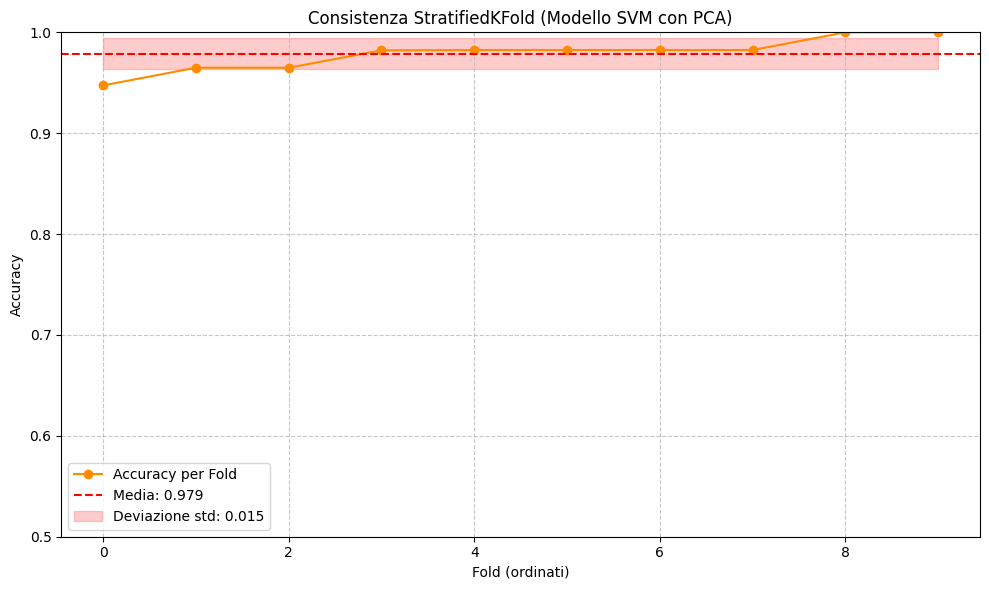

In [442]:
# Grafico di consistenza per Stratified K-Fold
plt.figure(figsize=(10, 6))
x_indices = np.arange(len(accuracy_stratified_SVM))
plt.plot(x_indices, sorted(accuracy_stratified_SVM), 'o-', label='Accuracy per Fold', color='darkorange')
plt.axhline(y=np.mean(accuracy_stratified_SVM), color='red', linestyle='--', label=f'Media: {np.mean(accuracy_stratified_SVM):.3f}')
plt.fill_between(x_indices, np.mean(accuracy_stratified_SVM) - np.std(accuracy_stratified_SVM),
                 np.mean(accuracy_stratified_SVM) + np.std(accuracy_stratified_SVM), alpha=0.2, color='red',
                 label=f'Deviazione std: {np.std(accuracy_stratified_SVM):.3f}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Consistenza StratifiedKFold (Modello SVM con PCA)')
plt.xlabel('Fold (ordinati)')
plt.ylabel('Accuracy')
plt.ylim([min(min(accuracy_stratified_SVM) - 0.05, 0.5), 1.0])
plt.legend()

plt.tight_layout()
plt.show()

***Conclusioni*** \\
In questa ultima parte andremo a mettere a confronto i due modelli, andando ad analizzare le segeutni caratteristiche:
- Confronto curve ROC
- Confronto intervallo di confidenza
- Confronto temp idi addestramento


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


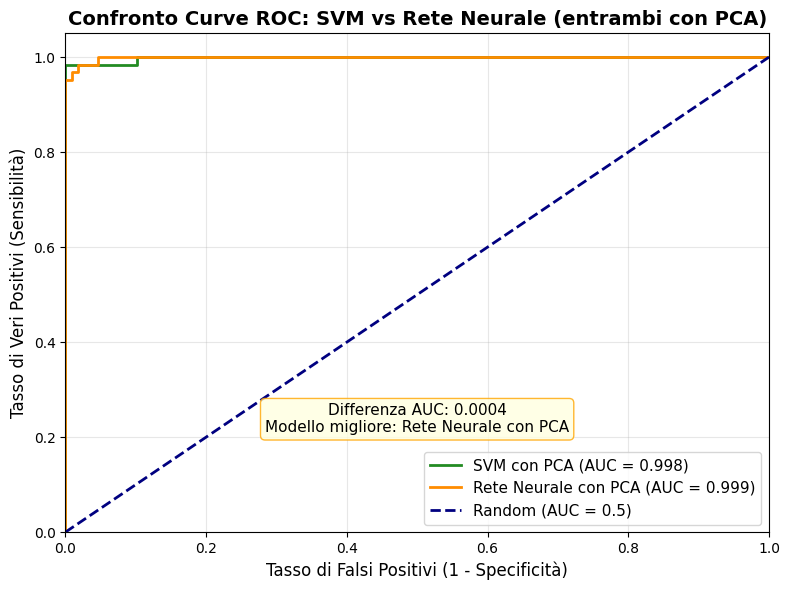

AUC SVM con PCA: 0.9984
AUC Rete Neurale con PCA: 0.9988
Differenza AUC: 0.0004
Modello con performance migliore: Rete Neurale con PCA


In [443]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Per SVM con PCA (aggiornato)
fpr_svm, tpr_svm, _ = roc_curve(y_test, model_pca_SVM.predict_proba(X_test_pca)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Per la rete neurale con PCA
fpr_nn, tpr_nn, _ = roc_curve(y_test, model_pca_RN.predict(X_test_pca).flatten())
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Creazione del grafico di confronto
plt.figure(figsize=(8, 6))

# Curva ROC per SVM con PCA
plt.plot(fpr_svm, tpr_svm, color='forestgreen', lw=2,
         label=f'SVM con PCA (AUC = {roc_auc_svm:.3f})')

# Curva ROC per la rete neurale con PCA
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2,
         label=f'Rete Neurale con PCA (AUC = {roc_auc_nn:.3f})')

# Linea diagonale di riferimento (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')

# Personalizzazione del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi (1 - Specificità)', fontsize=12)
plt.ylabel('Tasso di Veri Positivi (Sensibilità)', fontsize=12)
plt.title('Confronto Curve ROC: SVM vs Rete Neurale (entrambi con PCA)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

# Evidenziare differenze di performance
diff = abs(roc_auc_nn - roc_auc_svm)

# Aggiunta di un'annotazione per evidenziare la differenza
better_model = "Rete Neurale" if roc_auc_nn > roc_auc_svm else "SVM"
plt.annotate(f'Differenza AUC: {diff:.4f}\nModello migliore: {better_model} con PCA',
             xy=(0.5, 0.2), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
             fontsize=11, ha='center')

plt.tight_layout()
plt.show()

# Stampa dei valori AUC per il confronto numerico
print(f'AUC SVM con PCA: {roc_auc_svm:.4f}')
print(f'AUC Rete Neurale con PCA: {roc_auc_nn:.4f}')
print(f'Differenza AUC: {diff:.4f}')
print(f'Modello con performance migliore: {better_model} con PCA')

0.0017857142857141683


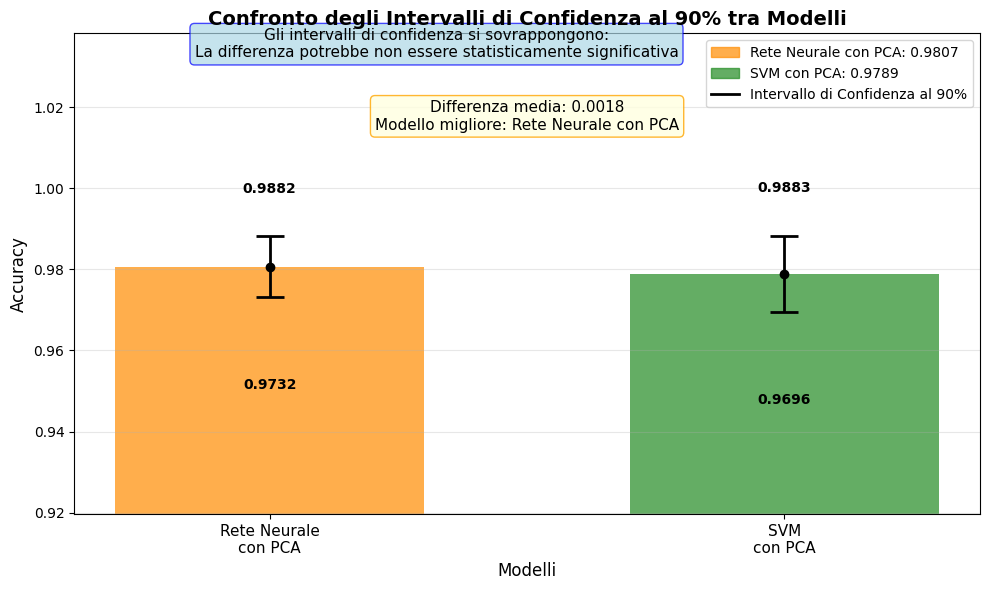

In [451]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Dati per il grafico (basati sui risultati della cross-validation)
# Modello 1: Rete Neurale con PCA
nn_mean_accuracy = mean_stratified_RN  # dal primo blocco di codice
nn_ci_low = ci_stratified_RN[0]  # limite inferiore dell'intervallo di confidenza
nn_ci_high = ci_stratified_RN[1]  # limite superiore dell'intervallo di confidenza

# Modello 2: SVM con PCA
svm_mean_accuracy = mean_stratified_SVM  # dal secondo blocco di codice
svm_ci_low = ci_stratified_SVM[0]  # limite inferiore dell'intervallo di confidenza
svm_ci_high = ci_stratified_SVM[1]  # limite superiore dell'intervallo di confidenza

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Posizioni per le barre
models = ['Rete Neurale\ncon PCA', 'SVM\ncon PCA']
x_pos = np.arange(len(models))
bar_width = 0.6

# Plot delle barre con le medie
nn_bar = plt.bar(x_pos[0], nn_mean_accuracy, bar_width, alpha=0.7, color='darkorange',
         label=f'Rete Neurale con PCA: {nn_mean_accuracy:.4f}')
svm_bar = plt.bar(x_pos[1], svm_mean_accuracy, bar_width, alpha=0.7, color='forestgreen',
         label=f'SVM con PCA: {svm_mean_accuracy:.4f}')

# Aggiunta degli errori per rappresentare gli intervalli di confidenza
plt.errorbar(x_pos[0], nn_mean_accuracy, yerr=[[nn_mean_accuracy-nn_ci_low], [nn_ci_high-nn_mean_accuracy]],
             fmt='o', color='black', capsize=10, capthick=2, elinewidth=2)
plt.errorbar(x_pos[1], svm_mean_accuracy, yerr=[[svm_mean_accuracy-svm_ci_low], [svm_ci_high-svm_mean_accuracy]],
             fmt='o', color='black', capsize=10, capthick=2, elinewidth=2)

# Aggiungiamo i valori dell'intervallo di confidenza come testo
plt.text(x_pos[0], nn_ci_low - 0.02, f'{nn_ci_low:.4f}', ha='center', va='top', fontweight='bold')
plt.text(x_pos[0], nn_ci_high + 0.01, f'{nn_ci_high:.4f}', ha='center', va='bottom', fontweight='bold')
plt.text(x_pos[1], svm_ci_low - 0.02, f'{svm_ci_low:.4f}', ha='center', va='top', fontweight='bold')
plt.text(x_pos[1], svm_ci_high + 0.01, f'{svm_ci_high:.4f}', ha='center', va='bottom', fontweight='bold')

# Personalizzazione del grafico
plt.title('Confronto degli Intervalli di Confidenza al 90% tra Modelli', fontsize=14, fontweight='bold')
plt.xlabel('Modelli', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x_pos, models, fontsize=11)

# Impostiamo i limiti dell'asse y in modo appropriato
# Calcoliamo il minimo e massimo considerando entrambi gli intervalli di confidenza
min_ci = min(nn_ci_low, svm_ci_low) - 0.05
max_ci = max(nn_ci_high, svm_ci_high) + 0.05
plt.ylim(min_ci, max_ci)

# Aggiungiamo la griglia per una migliore leggibilità
plt.grid(True, axis='y', alpha=0.3)

# Legenda personalizzata
nn_patch = mpatches.Patch(color='darkorange', alpha=0.7, label=f'Rete Neurale con PCA: {nn_mean_accuracy:.4f}')
svm_patch = mpatches.Patch(color='forestgreen', alpha=0.7, label=f'SVM con PCA: {svm_mean_accuracy:.4f}')
ci_line = plt.Line2D([0], [0], color='black', lw=2, label='Intervallo di Confidenza al 90%')
plt.legend(handles=[nn_patch, svm_patch, ci_line], loc='upper right')

# Annotiamo la differenza tra le medie se significativa
diff = abs(nn_mean_accuracy - svm_mean_accuracy)
print(diff)
if diff > 0.001:
    better_model = "Rete Neurale con PCA" if nn_mean_accuracy > svm_mean_accuracy else "SVM con PCA"
    plt.annotate(f'Differenza media: {diff:.4f}\nModello migliore: {better_model}',
                xy=(0.5, 0.8), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
                fontsize=11, ha='center')

# Verifichiamo la sovrapposizione degli intervalli
if (nn_ci_low <= svm_ci_high and nn_ci_high >= svm_ci_low):
    plt.annotate('Gli intervalli di confidenza si sovrappongono:\nLa differenza potrebbe non essere statisticamente significativa',
                xy=(0.4, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="blue", alpha=0.7),
                fontsize=11, ha='center')
else:
    plt.annotate('Gli intervalli di confidenza non si sovrappongono:\nLa differenza è statisticamente significativa',
                xy=(0.4, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", ec="green", alpha=0.7),
                fontsize=11, ha='center')

plt.tight_layout()
plt.show()

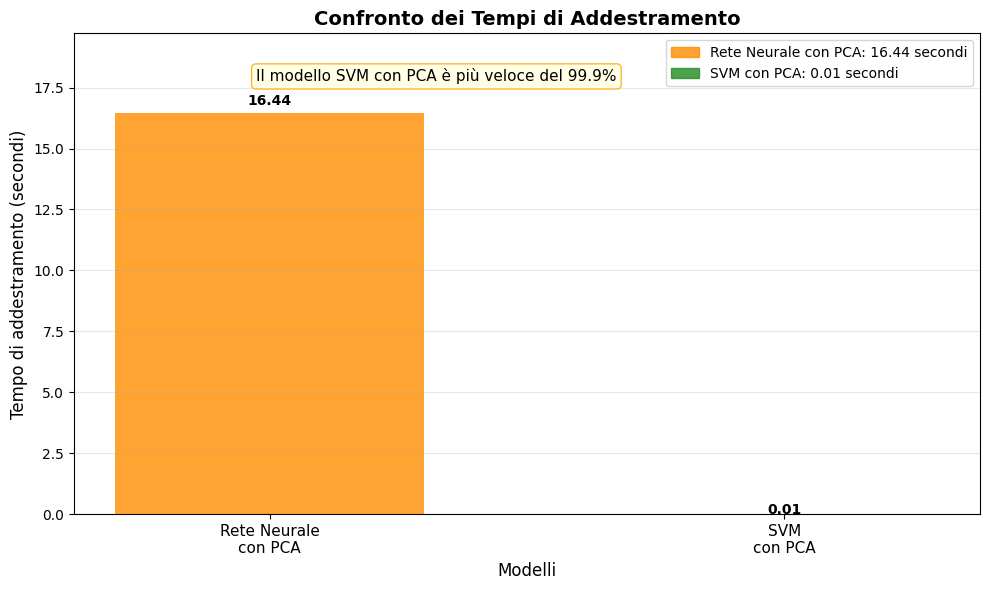

Tempo di addestramento - Rete Neurale con PCA: 16.44 secondi (0.27 minuti)
Tempo di addestramento - SVM con PCA: 0.01 secondi (0.00 minuti)
Differenza percentuale: 99.9%


In [445]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Tempi di addestramento (in secondi)
nn_time = training_time_pca_RN  # tempo di addestramento della rete neurale con PCA
svm_time = training_time_pca_SVM  # tempo di addestramento della SVM con PCA

# Converti in minuti per una migliore leggibilità (se i tempi sono lunghi)
nn_time_min = nn_time / 60
svm_time_min = svm_time / 60

# Decidi l'unità di misura in base al tempo massimo
if max(nn_time, svm_time) > 120:  # Se più di 2 minuti, usa i minuti
    nn_display = nn_time_min
    svm_display = svm_time_min
    time_unit = "minuti"
else:  # Altrimenti usa i secondi
    nn_display = nn_time
    svm_display = svm_time
    time_unit = "secondi"

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Definisci modelli e posizioni
models = ['Rete Neurale\ncon PCA', 'SVM\ncon PCA']
x_pos = np.arange(len(models))
bar_width = 0.6

# Plot delle barre
nn_bar = plt.bar(x_pos[0], nn_display, bar_width, alpha=0.8, color='darkorange')
svm_bar = plt.bar(x_pos[1], svm_display, bar_width, alpha=0.8, color='forestgreen')

# Aggiungiamo i valori esatti sopra le barre
plt.text(x_pos[0], nn_display*1.02, f'{nn_display:.2f}', ha='center', fontweight='bold')
plt.text(x_pos[1], svm_display*1.02, f'{svm_display:.2f}', ha='center', fontweight='bold')

# Personalizzazione del grafico
plt.title('Confronto dei Tempi di Addestramento', fontsize=14, fontweight='bold')
plt.xlabel('Modelli', fontsize=12)
plt.ylabel(f'Tempo di addestramento ({time_unit})', fontsize=12)
plt.xticks(x_pos, models, fontsize=11)

# Aggiungiamo un po' di spazio nella parte superiore
plt.ylim(0, max(nn_display, svm_display) * 1.2)

# Aggiungiamo la griglia per una migliore leggibilità
plt.grid(True, axis='y', alpha=0.3)

# Calcoliamo la differenza percentuale
if nn_time > svm_time:
    faster_model = "SVM con PCA"
    diff_percent = (nn_time - svm_time) / nn_time * 100
else:
    faster_model = "Rete Neurale con PCA"
    diff_percent = (svm_time - nn_time) / svm_time * 100

# Aggiungiamo un'annotazione per evidenziare la differenza
plt.annotate(f'Il modello {faster_model} è più veloce del {diff_percent:.1f}%',
            xy=(0.4, 0.9), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
            fontsize=11, ha='center')

# Legenda personalizzata
nn_patch = mpatches.Patch(color='darkorange', alpha=0.8, label=f'Rete Neurale con PCA: {nn_display:.2f} {time_unit}')
svm_patch = mpatches.Patch(color='forestgreen', alpha=0.8, label=f'SVM con PCA: {svm_display:.2f} {time_unit}')
plt.legend(handles=[nn_patch, svm_patch], loc='upper right')

plt.tight_layout()
plt.show()

# Stampa anche i valori esatti per riferimento
print(f"Tempo di addestramento - Rete Neurale con PCA: {nn_time:.2f} secondi ({nn_time_min:.2f} minuti)")
print(f"Tempo di addestramento - SVM con PCA: {svm_time:.2f} secondi ({svm_time_min:.2f} minuti)")
print(f"Differenza percentuale: {diff_percent:.1f}%")